In [26]:
import os
import numpy as np
from scipy import integrate
import sys
sys.path.append('../../scripts/')

import matplotlib.pyplot as plt
import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 24)

In [2]:
npeerlist = [0, 1, 3, 5, 10, 15, 20, 25, 35]
ntargets = [50, 100, 150]
method = 'rr_sb0.05'

In [20]:
simdirfmt = '15158_450_20_800_30_{:d}_100_0.01_0.0_50_1.0_0.6_4.0_0.1_20_0.02'
srcdir = '/scratch/sbanerj/trans-eqtl/simulation'

aucdict = dict()
aucerr = dict()
for ntarget in ntargets:
    auclist = list()
    errlist = list()
    simdir = simdirfmt.format(ntarget)
    for npeer in npeerlist:
        outfile = os.path.join(srcdir, simdir, 'rocdata/npeer{:d}_{:s}_fpr_tpr.txt'.format(npeer, method))
        roc = np.loadtxt(outfile, skiprows=1)
        auc = integrate.simps(roc[:, 1], roc[:, 0])
        auclist.append(auc)
        errlist.append(0.02)
    aucdict[ntarget] = auclist
    aucerr[ntarget] = errlist

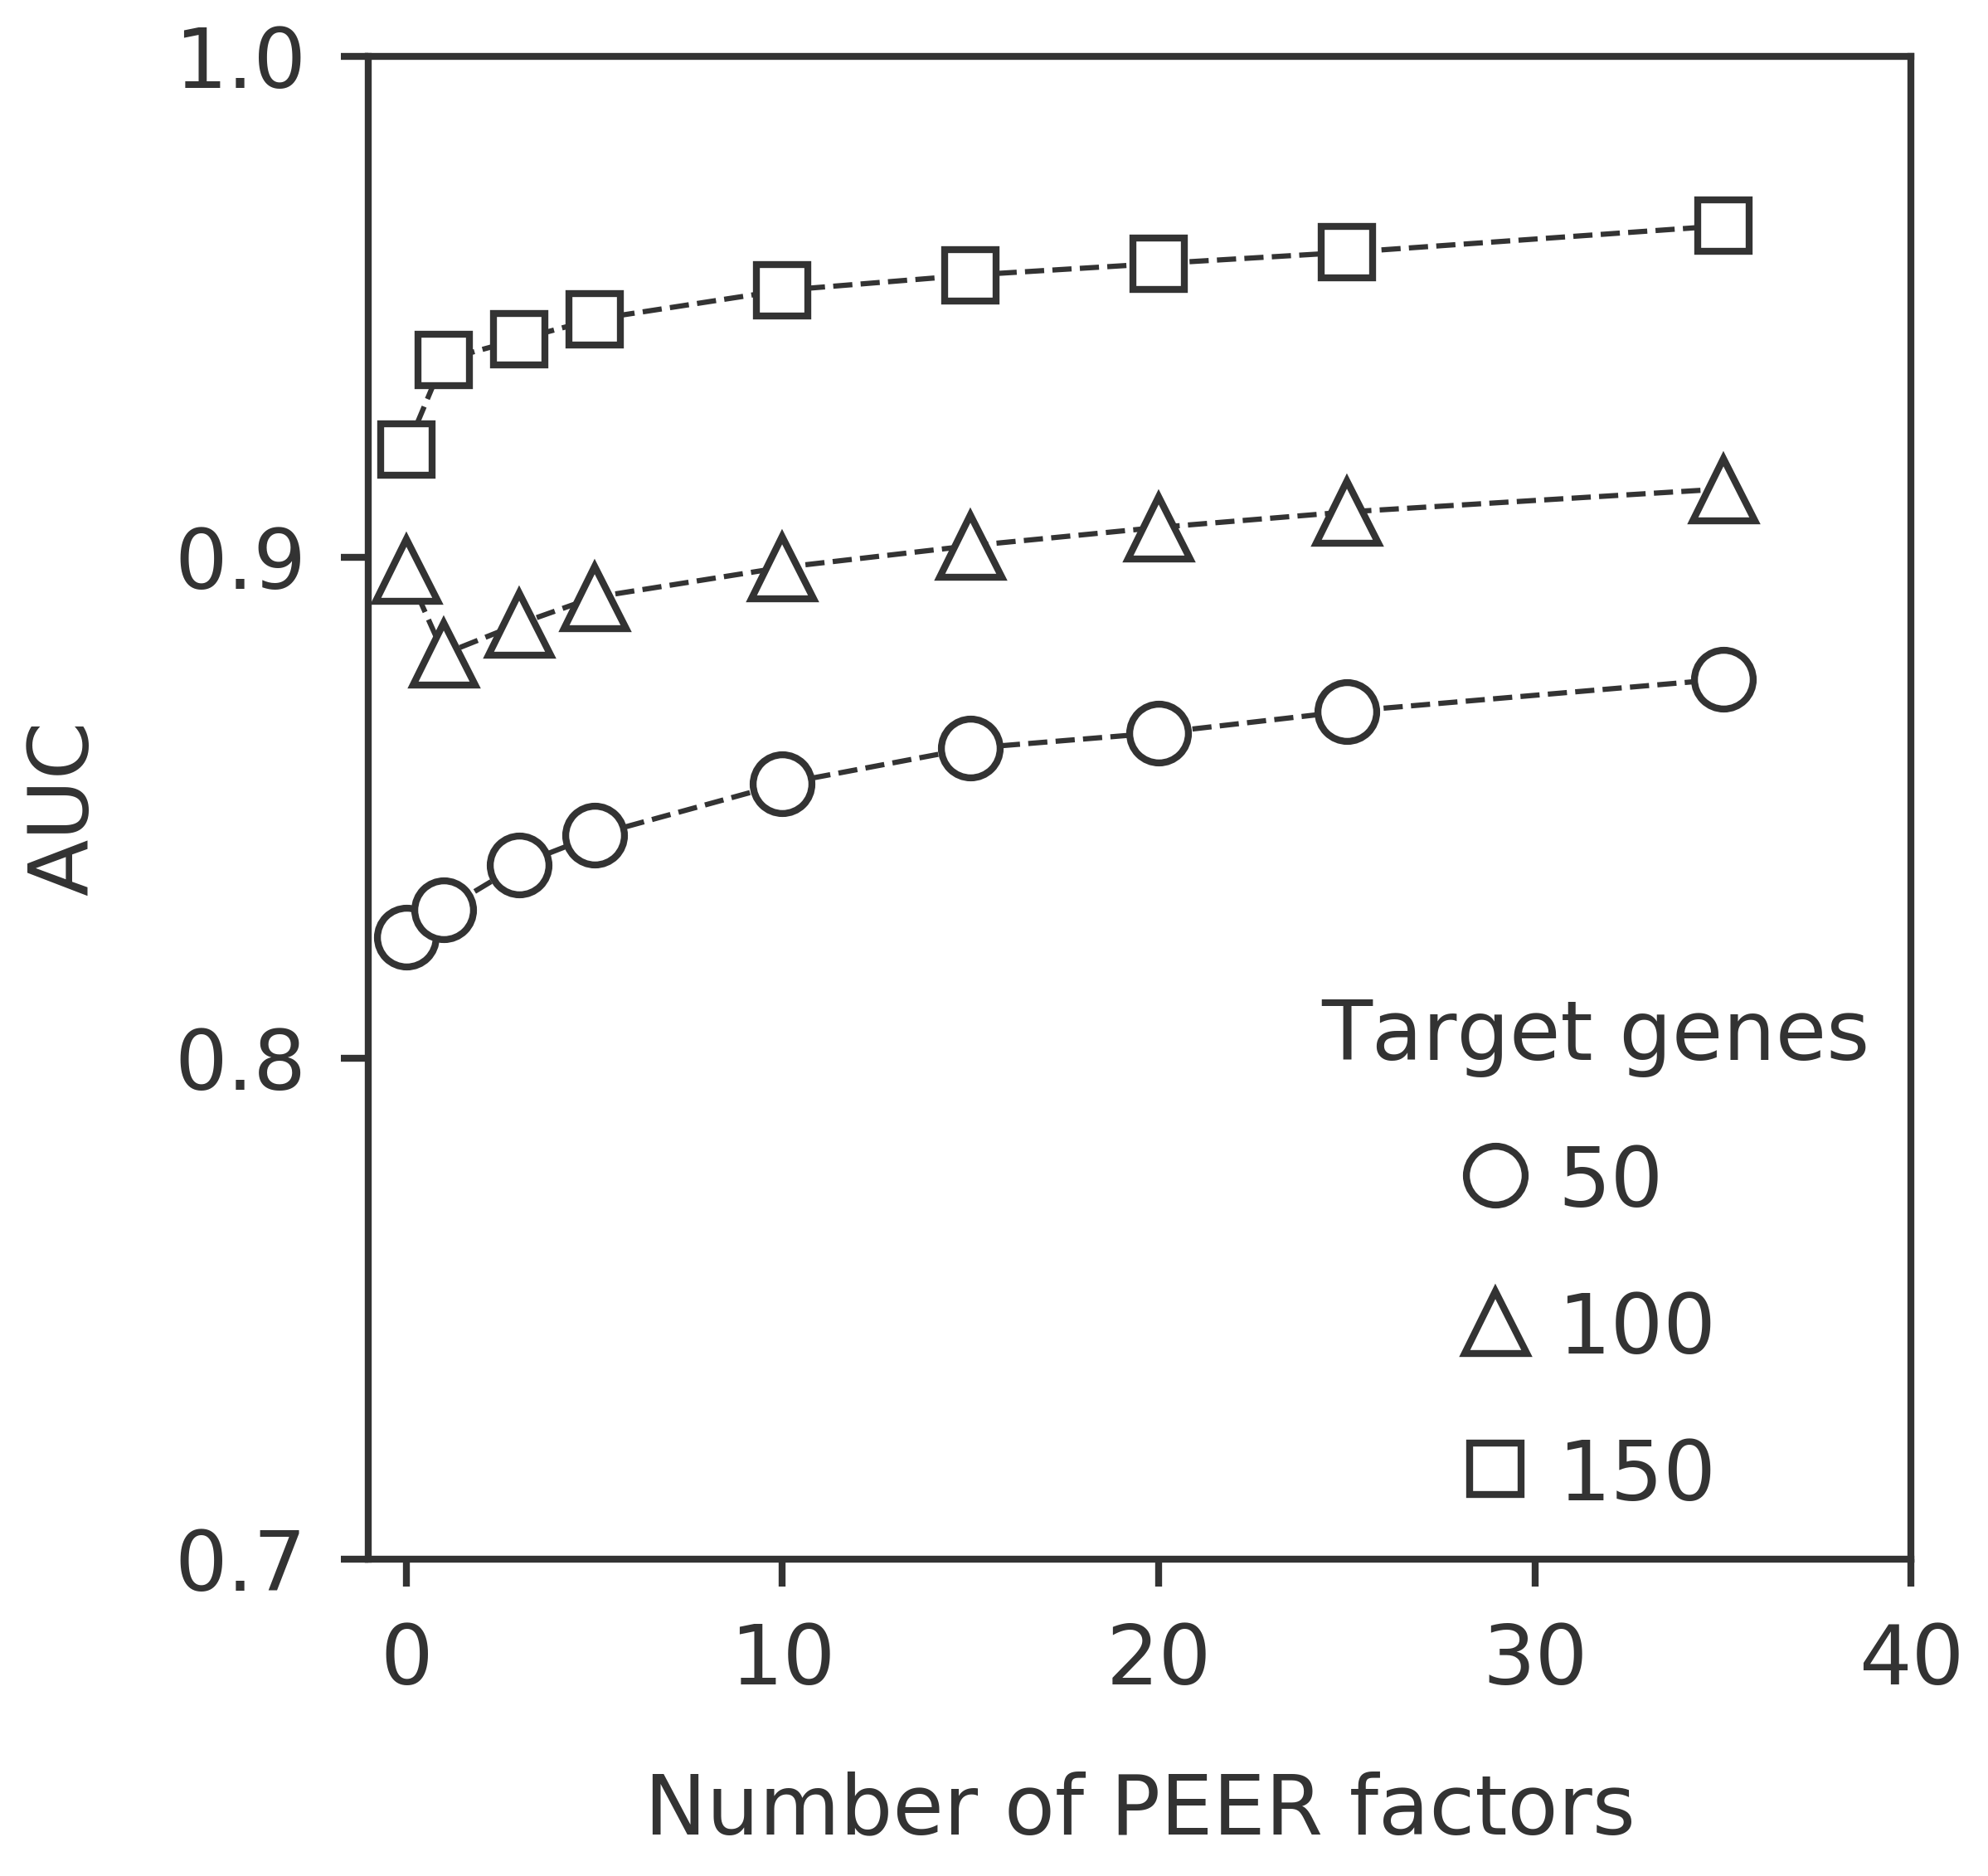

In [29]:
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)

# methodcolors = {'rr_sb0.05':  '#cc3129ff',
#                 'jpa': '#ff8680ff',
#                 'matrixeqtl': '#209E2FFF',
#                 'matrixeqtl_fdr': '#1fcc80ff'}

# methodlabels = {'rr_sb0.05': 'RevReg',
#                 'jpa': 'JPA',
#                 'matrixeqtl': 'MatrixEQTL'}

# methodmarkers = {'rr_sb0.05': 'o',
#                 'jpa': '^',
#                 'matrixeqtl': 's'}

# methodmarkersizes = {'rr_sb0.05': 17,
#                      'jpa': 18,
#                      'matrixeqtl': 15}

methodmarkers = {50: 'o', 100: '^', 150: 's'}
methodmarkersizes = {50: 17, 100: 18, 150: 15}
methodlabels = {50: '50', 100: '100', 150: '150'}
#methodcolors = {50: '#cc3129ff', 100: '#cc3129ff', 150: '#cc3129ff'}
methodcolors = {50: '#ffffff', 100: '#ffffff', 150: '#ffffff'}

borderwidth = 2
errorbarcolor = '#333333'


for method in ntargets:
#     ax1.errorbar(npeerlist, aucdict[method], yerr = aucerr[method], 
#                  fmt = methodmarkers[method],
#                  markersize = methodmarkersizes[method], markerfacecolor = methodcolors[method],
#                  markeredgewidth = 0, #borderwidth, # controls thickness of the error bar cap
#                  markeredgecolor = methodcolors[method],
#                  ecolor = methodcolors[method], elinewidth = borderwidth, capsize = 10)
    ax1.plot(npeerlist, aucdict[method],
             marker = methodmarkers[method],
             markersize = methodmarkersizes[method], 
             markerfacecolor = methodcolors[method],
             markeredgewidth = 2, #borderwidth, # controls thickness of the error bar cap
             markeredgecolor = '#333333',#methodcolors[method], 
             linestyle = None, linewidth = 0,
             label = methodlabels[method], zorder = 20)
    ax1.plot(npeerlist, aucdict[method], linestyle = 'dashed', color = '#333333', zorder = 10)

#ax1.grid(color='dimgray', lw=0.5, alpha=0.8)
ax1.set_xlabel("Number of PEER factors")
ax1.set_ylabel("AUC")
ax1.legend(loc = 'lower right', title = 'Target genes')

ax1.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax1.set_ylim(0.7, 1.0)
ax1.set_xlim(-1, 40)
plt.savefig('../plots/npeer_tejaas_rr_diff_ntrans_mean04_gtex_ms_correlation.png', bbox_inches='tight')
plt.show()

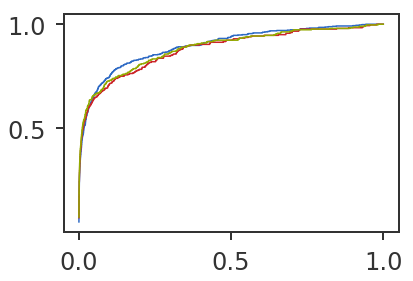

In [22]:
# fig = plt.figure()
# ax1 = fig.add_subplot(111)

# method = 'rr_sb0.05'
# simdir = simdirfmt.format(100)
# outfile = os.path.join(srcdir, simdir, 'rocdata/npeer{:d}_{:s}_fpr_tpr.txt'.format(0, method))
# mroc = np.loadtxt(outfile, skiprows=1)
# ax1.plot(mroc[:, 0], mroc[:, 1])
# outfile = os.path.join(srcdir, simdir, 'rocdata/npeer{:d}_{:s}_fpr_tpr.txt'.format(1, method))
# mroc = np.loadtxt(outfile, skiprows=1)
# ax1.plot(mroc[:, 0], mroc[:, 1])
# outfile = os.path.join(srcdir, simdir, 'rocdata/npeer{:d}_{:s}_fpr_tpr.txt'.format(3, method))
# mroc = np.loadtxt(outfile, skiprows=1)
# ax1.plot(mroc[:, 0], mroc[:, 1])

# plt.show()